<b>Letsgrowmore </b>
- NAME : SANKALP KUMAR B R
- TASK : IRIS FLOWER CLASSIFICATION


<b> Problem Statement :</b>
    - The aim of this project is to classify flowers among setosa, versicolor, or virginica species on basis of length of sepals and petals and width of sepals and petals.

### Import required Libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler 
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [2]:
plt.rcParams['figure.figsize']=[15,8]

In [3]:
iris = pd.read_csv('iris.csv',index_col=0)
print("The first five observations in the dataset :")
iris.head()

The first five observations in the dataset :


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
print("The last five observations in the dataset :")
iris.tail()

The last five observations in the dataset :


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica
149,6.2,3.4,5.4,2.3,Iris-virginica
150,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
### Checking the shape of the data

In [6]:
iris.shape

(150, 5)

- we can see that there are 150 observations and 5 attributes in our dataset.

In [7]:
# Checking for the data types in our dataset

In [8]:
iris.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

- from the above output, we can infer that all the attributes are identified correctly.

In [9]:
# Five point summary 

In [10]:
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


- from the above output, we can infer that: 
    - there is no missing values since the count of all the attributes is 150.
    - most of the values for SepalLength is between 5.1-6.4, for SepalWidth is between 2.8-3.3, for PetalLength is between 1.6-5.1 and for Petalwidth is between 0.3-1.8.
    

In [11]:
# for categorical data

In [12]:
iris.describe(include=object)

,Species
count,150
unique,3
top,Iris-versicolor
freq,50


- the Species is the only categorical variable in the dataset.
- there are no missing values, and there are 3 unqiue categories meaning it is a multi-class problem.
- iris-virginica has the most number of observations with the frequency of 50.

### Checking for null values and treating them.

In [13]:
Total = iris.isnull().sum().sort_values(ascending=False) 


Percent = (iris.isnull().sum()*100/iris.isnull().count()).sort_values(ascending=False)   


missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])

# print the missing data
missing_data

,Total,Percentage of Missing Values
SepalLengthCm,0,0.0
SepalWidthCm,0,0.0
PetalLengthCm,0,0.0
PetalWidthCm,0,0.0
Species,0,0.0


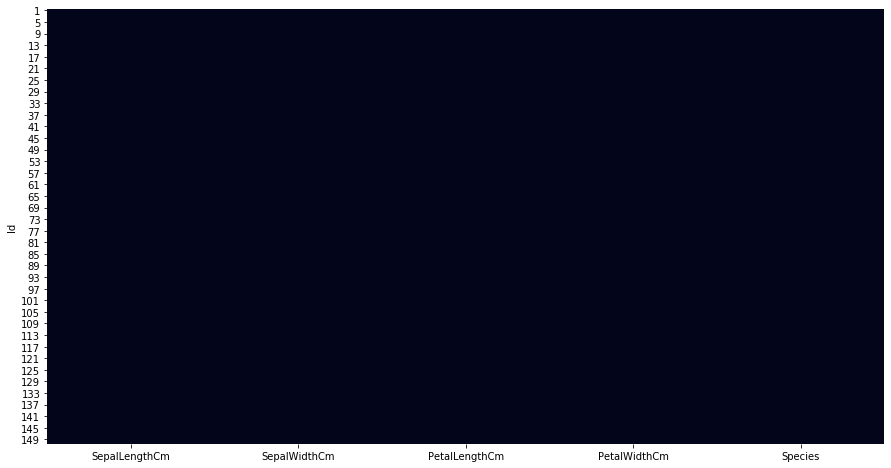

In [14]:
plt.figure(figsize=(15, 8))


sns.heatmap(iris.isnull(), cbar=False)

plt.show()

- from the above plot and table, we can see that there are no missing values in our dataset.

### EDA

In [15]:
# checking for outliers using boxplot

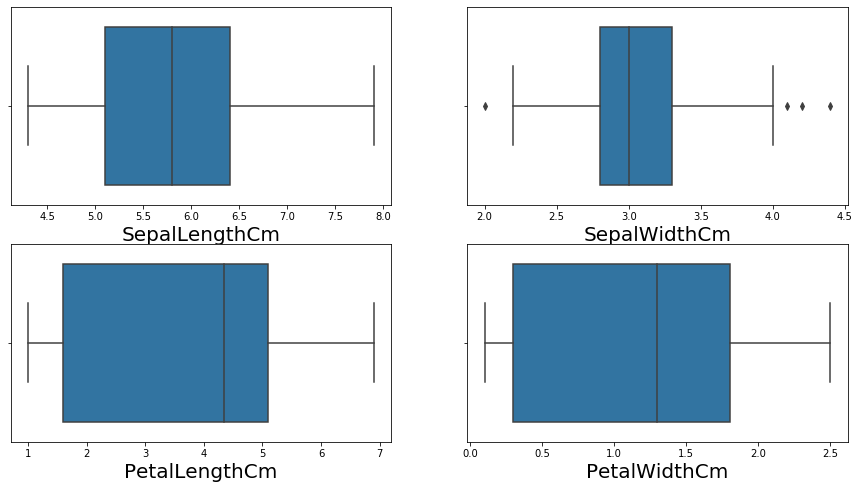

In [16]:
fig, ax = plt.subplots(2, 2, figsize=(15, 8))

for variable, subplot in zip(iris.columns, ax.flatten()):
    z = sns.boxplot(x = iris[variable], orient = "h",whis=1.5 , ax=subplot)
    z.set_xlabel(variable, fontsize = 20)     

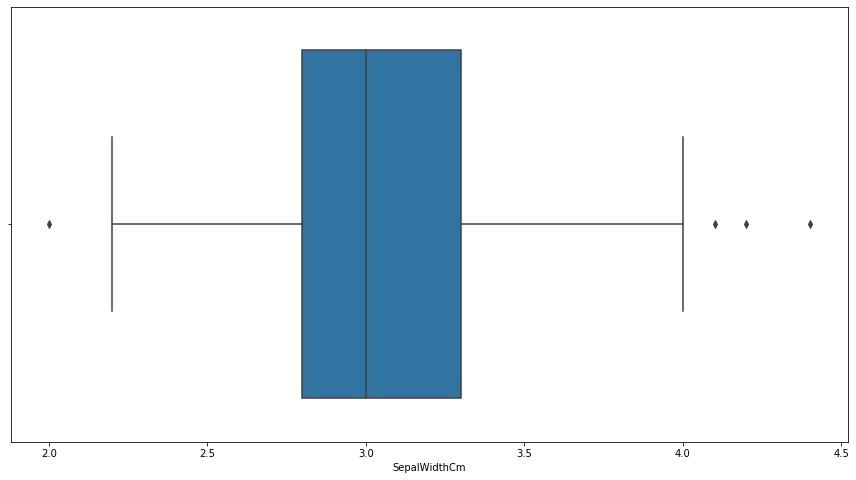

In [17]:
sns.boxplot(iris['SepalWidthCm'])
plt.show()

- we can from the boxplot that there are no outliers. However, there are few outliers in SepalWidth which is very minimal and can be ignored.

In [18]:
# visualizing a countplot for our categorical variable

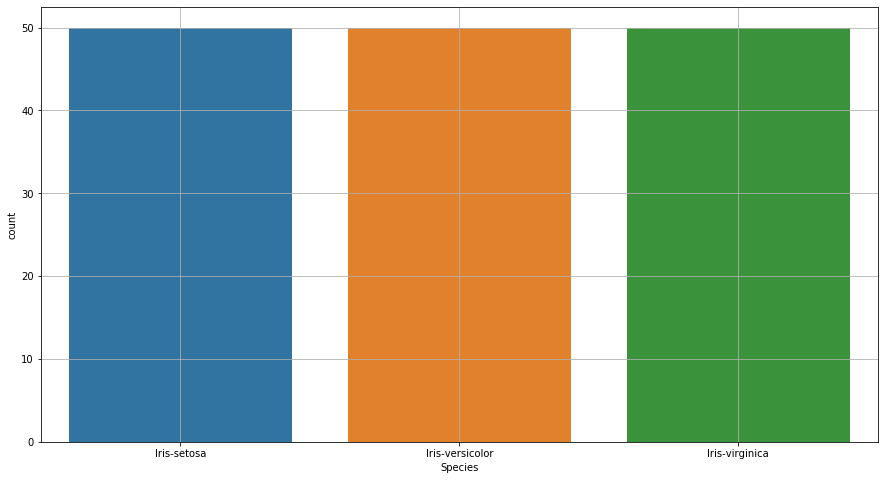

In [19]:
sns.countplot(iris['Species'])
plt.grid()
plt.show()

In [20]:
### checking for correlation between variables 

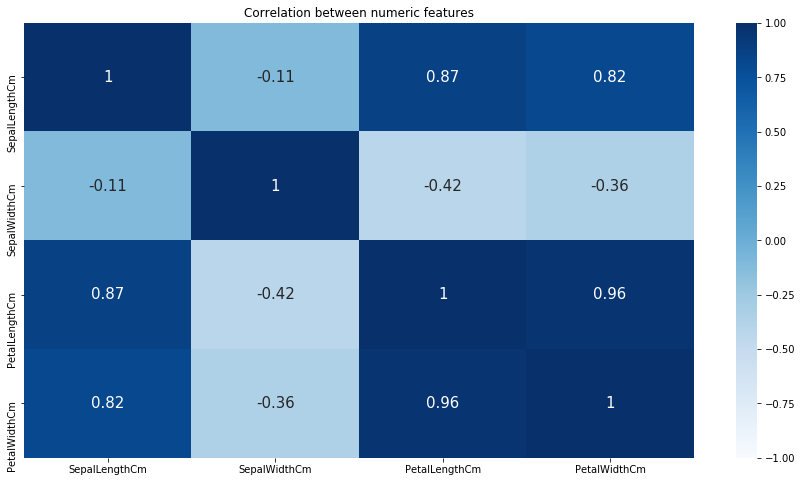

In [21]:
sns.heatmap(iris.corr(), cmap='Blues', vmax=1.0, vmin=-1.0, annot = True, annot_kws={"size": 15}, )

# specify name of the plot using plt.title()
plt.title('Correlation between numeric features')

# display the plot
plt.show()

- from the above heatmap,we can infer that there is high correlation between PetalLength and SepalLength, PetalWidth and SepalLength, PetalWidth and PetalLength. We can consider these variables for now as there are only 4 variables and if we remove 2 of them, we would be left out with only 2.

In [22]:
#Histogram and Skewness

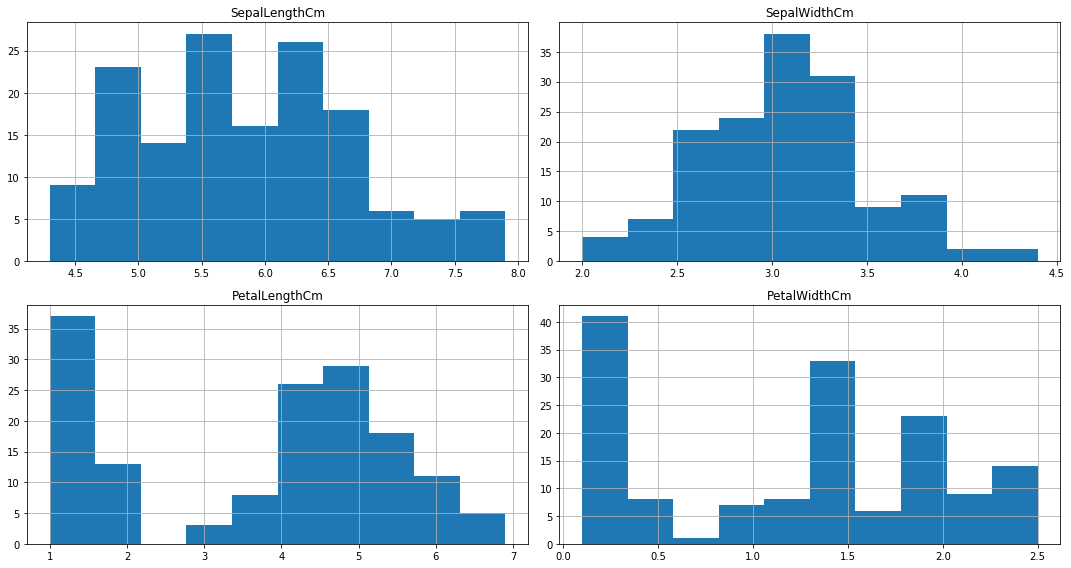

Skewness:


SepalLengthCm    0.314911
SepalWidthCm     0.334053
PetalLengthCm   -0.274464
PetalWidthCm    -0.104997
dtype: float64

In [23]:
iris.drop('Species', axis = 1).hist()
plt.tight_layout()
plt.show()  
print('Skewness:')
iris.drop('Species', axis = 1).skew()

- from the above plots, we can infer that Sepal length and Sepal width is right skewed. While Petal length and Petal width is left skewed.

In [24]:
iris['Species'].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

In [25]:
### Encoding categorical variable

In [26]:
labelencoder = LabelEncoder()
iris['Species']= labelencoder.fit_transform(iris['Species'])
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,0
2,4.9,3.0,1.4,0.2,0
3,4.7,3.2,1.3,0.2,0
4,4.6,3.1,1.5,0.2,0
5,5.0,3.6,1.4,0.2,0


In [27]:
iris['Species'].unique()

array([0, 1, 2])

In [28]:
#scale the data

In [29]:
Standard_scaler = StandardScaler()
df1 = iris.loc[:,['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
Standard_scaler.fit(df1)
df_final = pd.DataFrame(Standard_scaler.transform(df1), columns=df1.columns)

# First 5 observation
df_final.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [30]:
x = df_final
y = iris['Species']

In [31]:
x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [32]:
y.head()

Id
1    0
2    0
3    0
4    0
5    0
Name: Species, dtype: int32

In [33]:
#train-test split

In [94]:
x = sm.add_constant(x)

X_train, X_test, y_train, y_test = train_test_split(x,y,random_state = 23, test_size = 0.3)

# print dimension of train set
print('X_train', X_train.shape)
print('y_train', y_train.shape)

# print dimension of test set
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (105, 5)
y_train (105,)
X_test (45, 5)
y_test (45,)


- train size is 70 % and test size is 30 % 

### Model building

In [35]:
# 1-Logistic Regression

In [95]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

In [96]:
print("Logistic Regression model score is", accuracy)

Logistic Regression model score is 0.9777777777777777


In [97]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       0.93      1.00      0.97        14
           2       1.00      0.92      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.98        45
weighted avg       0.98      0.98      0.98        45



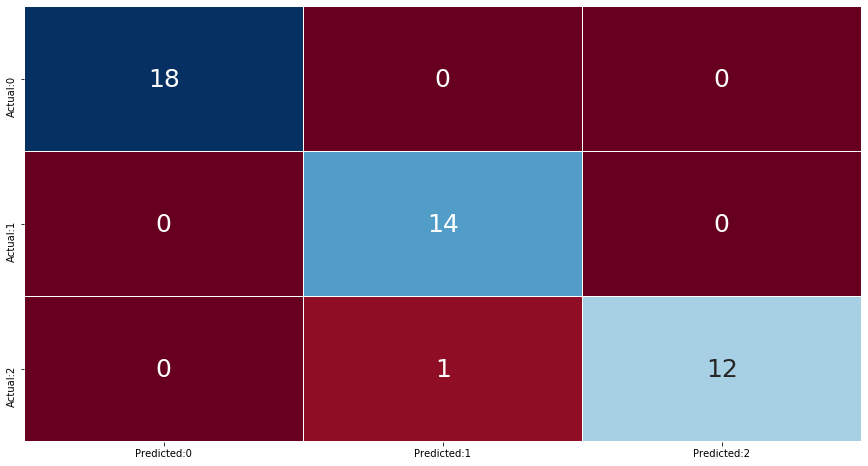

In [98]:
cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1','Predicted:2'], index = ['Actual:0','Actual:1','Actual:2'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'RdBu' , cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.show()

In [54]:
# 2- Naive bayes

In [99]:
gnb = GaussianNB()
gnb_model = gnb.fit(X_train, y_train)

In [100]:
y_pred = gnb_model.predict(X_test)

In [101]:
print('Naive Bayes model accuracy is :',accuracy_score(y_test, y_pred))

Naive Bayes model accuracy is : 0.9555555555555556


In [102]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       0.93      0.93      0.93        14
           2       0.92      0.92      0.92        13

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



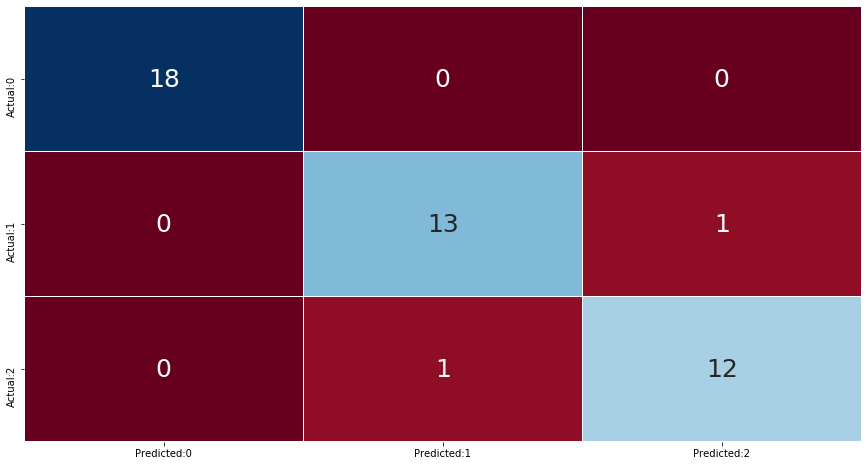

In [103]:
cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1','Predicted:2'], index = ['Actual:0','Actual:1','Actual:2'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'RdBu' , cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.show()

In [60]:
# 3-KNN model

In [104]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

In [105]:
print("KNN model score is", accuracy)

KNN model score is 0.9777777777777777


In [106]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       0.93      1.00      0.97        14
           2       1.00      0.92      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.98        45
weighted avg       0.98      0.98      0.98        45



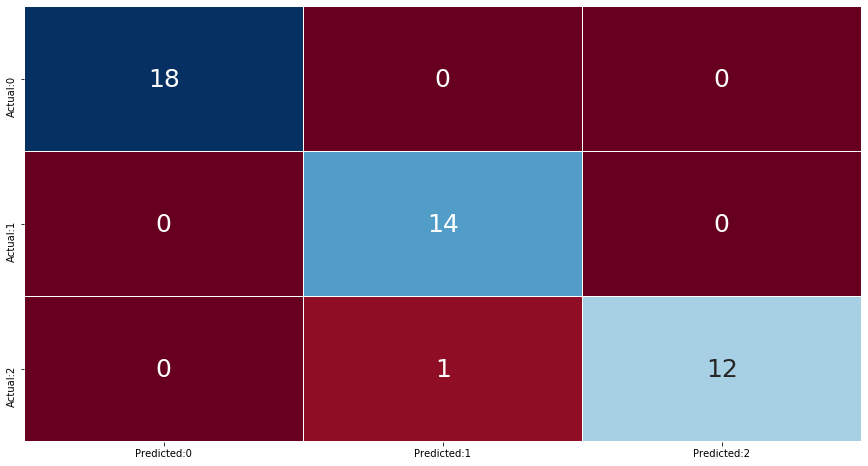

In [107]:
cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1','Predicted:2'], index = ['Actual:0','Actual:1','Actual:2'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'RdBu' , cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.show()

In [65]:
# 4 - Decision Tree

In [108]:
decision_tree_classification = DecisionTreeClassifier()
# fit the model using fit() on train data
decision_tree = decision_tree_classification.fit(X_train, y_train)

In [109]:
print("DecisionTree Model Score is : ",decision_tree.score(X_test,y_test))

DecisionTree Model Score is :  0.9777777777777777


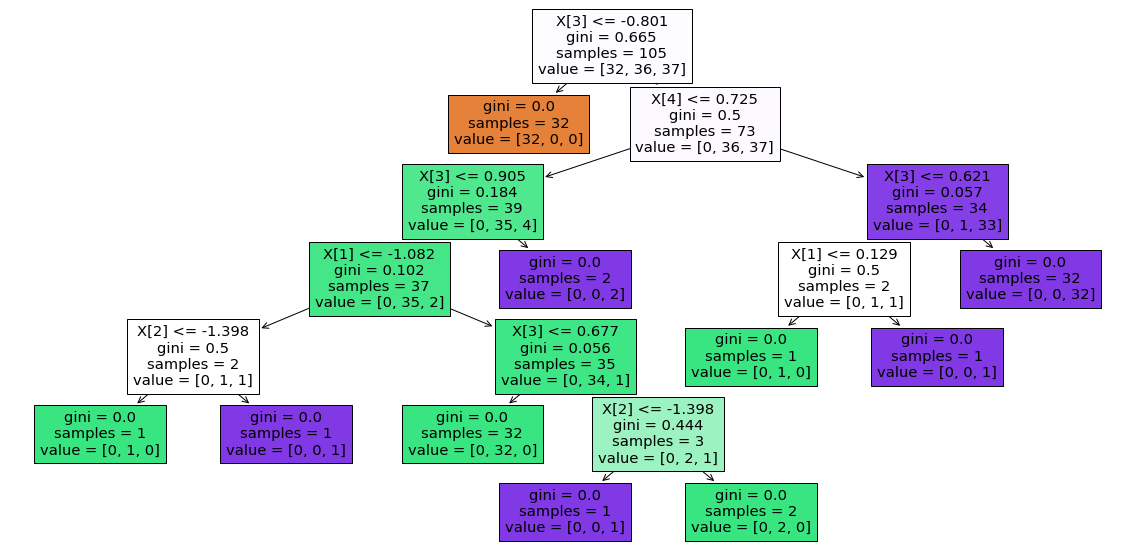

In [110]:
from sklearn import tree
plt.figure(figsize=(20,10))
tree.plot_tree(decision_tree,filled=True)
plt.show()

In [111]:
tuned_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random']
    
}

In [112]:
decision_tree_classification = DecisionTreeClassifier(random_state = 10)


tree_grid = GridSearchCV(estimator = decision_tree_classification, 
                         param_grid = tuned_param, 
                         cv = 5)

In [113]:
tree_grid_model = tree_grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for decision tree classifier: ', tree_grid_model.best_params_, '\n')

Best parameters for decision tree classifier:  {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 4, 'splitter': 'random'} 



In [122]:
dt = DecisionTreeClassifier(criterion = 'gini', max_depth =8,min_samples_leaf= 1, min_samples_split= 4,  splitter ='random')
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=8, min_samples_split=4, splitter='random')

In [123]:
print("accuracy for decision tree is :",dt.score(X_test,y_test))

accuracy for decision tree is : 0.9777777777777777


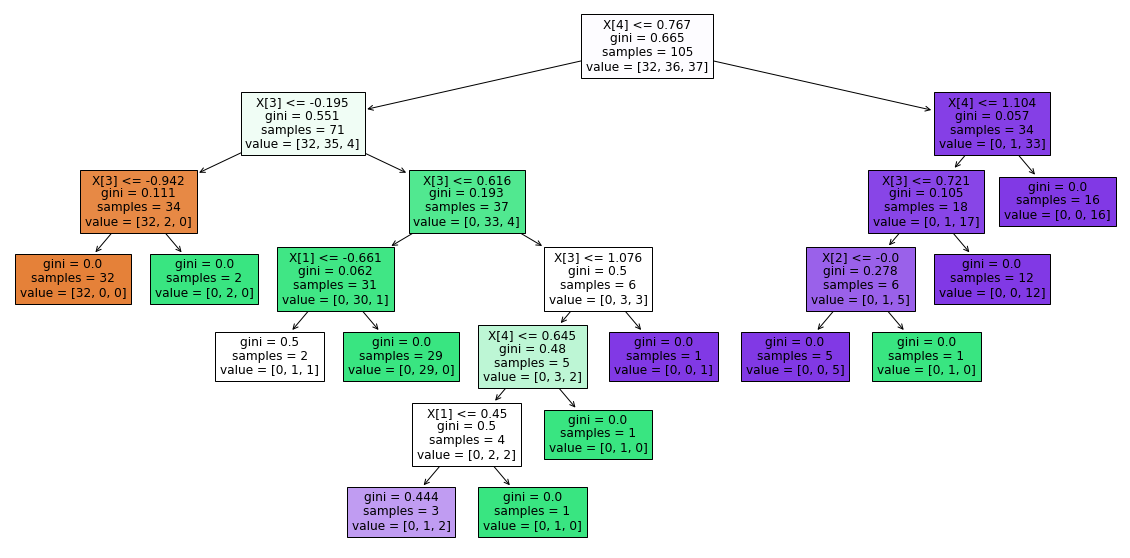

In [125]:
plt.figure(figsize=(20,10))
tree.plot_tree(dt,filled=True)
plt.show()

In [117]:
# 5- RandomForest

In [128]:
rf = RandomForestClassifier(random_state = 40)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

In [129]:
print("Random_Forest model Score is : ", accuracy)

Random_Forest model Score is :  0.9777777777777777


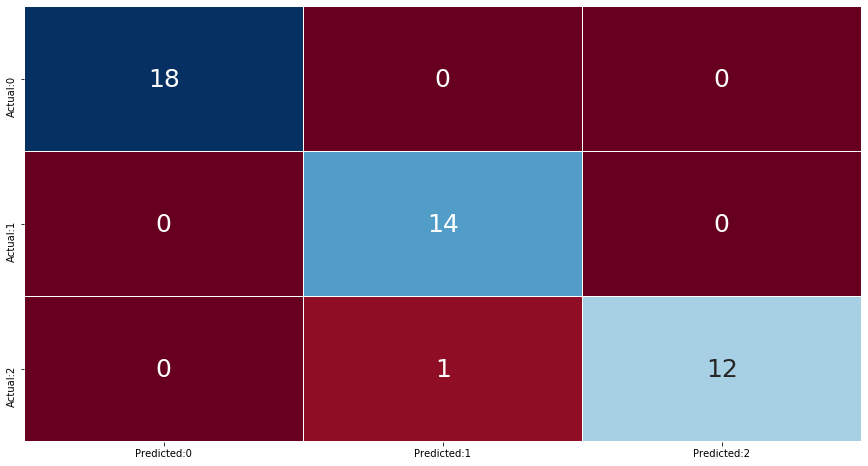

In [130]:
cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1','Predicted:2'], index = ['Actual:0','Actual:1','Actual:2'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'RdBu' , cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.show()

In [131]:
tuned_paramaters = [{'criterion': ['entropy', 'gini'],
                     'n_estimators': [10, 20, 30],#50, 70, 90
                     'max_depth': [10, 15, 20],
                     'max_features': ['sqrt', 'log2'],
                     'min_samples_split': [2, 5, 8, 11],
                     'min_samples_leaf': [1, 5, 9],
                     'max_leaf_nodes': [2, 5, 8, 11]}]
 
    
random_forest_classification = RandomForestClassifier(random_state = 10)

# use GridSearchCV() to find the optimal value of the hyperparameters
# estimator: pass the random forest classifier model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 5
rf_grid = GridSearchCV(estimator = random_forest_classification, 
                       param_grid = tuned_paramaters, 
                       cv = 5)

# use fit() to fit the model on the train set
rf_grid_model = rf_grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for random forest classifier: ', rf_grid_model.best_params_, '\n')

Best parameters for random forest classifier:  {'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'max_leaf_nodes': 5, 'min_samples_leaf': 9, 'min_samples_split': 2, 'n_estimators': 30} 



In [142]:
rf_model = RandomForestClassifier(criterion = rf_grid_model.best_params_.get('criterion'), 
                                  n_estimators = rf_grid_model.best_params_.get('n_estimators'),
                                  max_depth = rf_grid_model.best_params_.get('max_depth'),
                                  max_features = rf_grid_model.best_params_.get('max_features'),
                                  max_leaf_nodes = rf_grid_model.best_params_.get('max_leaf_nodes'),
                                  min_samples_leaf = rf_grid_model.best_params_.get('min_samples_leaf'),
                                  min_samples_split = rf_grid_model.best_params_.get('min_samples_split'),
                                  random_state = 40)

# use fit() to fit the model on the train set
rf_model = rf_model.fit(X_train, y_train)

In [143]:
y_pred = rf_model.predict(X_test)
accuracy_rf_tuned = accuracy_score(y_test, y_pred)

In [144]:
print("Random_Forest Tuned Model Score is : ", accuracy_rf_tuned)

Random_Forest Tuned Model Score is :  0.9777777777777777


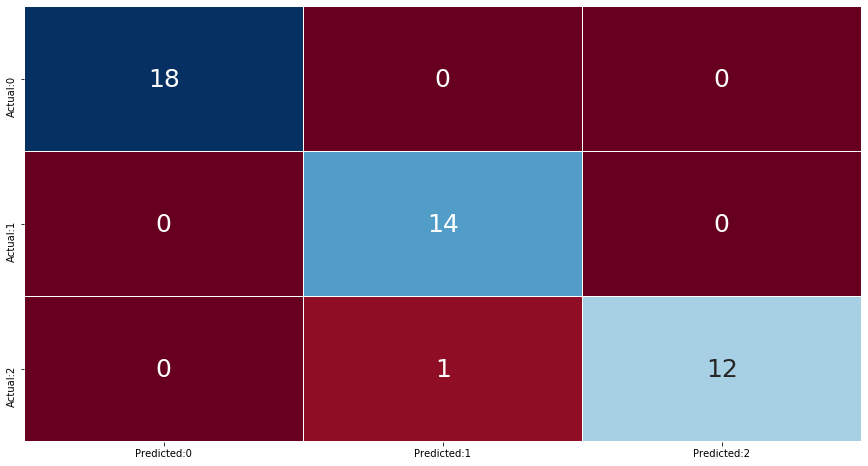

In [145]:
cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1','Predicted:2'], index = ['Actual:0','Actual:1','Actual:2'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'RdBu' , cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.show()

- Conclusion :
    - missing value analysis has been done and there are no missing values in our dataset.
    - label encoding has been done for categorical variables(target variable).
    - train-test split is done with 70-30%
    - 7 different models have been built and accuracies are used as evaulation metrics. 
    - among these 7 models: logistic regression,knn,tuned random forest, tuned decision tree models are giving 97.7 % accuracy.However, we can treat random forest as our best model since they are boosting algorithms.